# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

**Описание исходных данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Названия колонок в верхнем регистре, нужно переделать в нижний, имеются пропуски данных - NaN (Не Число -и является одним из распространенных способов представления отсутствующего значения в данных)**

In [3]:
#Посмотрим общую информацию о датафрейме:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмотрим значения колонок с NaN
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [6]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:**

**Видим пропуски в столбцах:**
* Critic_Score
* User_Score
* Rating
* Name
* Year_of_Release
* Genre

**Типы данных:**
* Year_of_Release - год релиза игры - и его тип данных float, а не int
* User_Score - оценки пользователей = имеет неверный тип данных object, а должен иметь float 
* Critic_Score - оценки критиков = имеет неверный тип данных float, а должен иметь int, т.к. в нём целые численные значения, на metacritic - приняты целые значения оценок у критиков).

**В User_Score помимо должных цифр, имеется значение tbd**

## Подготовка данных

На базе вышеизложенной информации, произведём подготовку данных для дальнейшего анализа:
- Приведём к нижнему регистру названия колонок;
- Проверим на дубликаты
- Обработаем пропуски в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. 
- Преобразуем данные в нужные типы:
    - колонку Year_of_Release преобразуем в int
    - колонку User_Score необходимо привести к типу данных float. Но прежде, надо разобраться со строковым значением 'tbd'.
    - Critic_Score преобразуем в int на metacritic - приняты целые значения оценок критиков

- Произведём расчёт суммарных продаж во всех регионах.

### Переименование колонок

In [7]:
# Переименование колонок
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверка на дубликаты

In [8]:
df.duplicated().sum()

0

In [9]:
duplicateRows = df[df.duplicated(['name', 'platform'])]
print(duplicateRows)

                              name platform  year_of_release     genre  \
1591   Need for Speed: Most Wanted     X360           2005.0    Racing   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
11715  Need for Speed: Most Wanted       PC           2012.0    Racing   
14244                          NaN      GEN           1993.0       NaN   
16230                Madden NFL 13      PS3           2012.0    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1591        1.0      0.13      0.02         0.10          83.0        8.5   
4127        0.0      0.48      0.00         0.00          43.0        4.1   
11715       0.0      0.06      0.00         0.02          82.0        8.5   
14244       0.0      0.00      0.03         0.00           NaN        NaN   
16230       0.0      0.01      0.00         0.00          83.0        5.5   

      rating  
1591       T  
4127    E10+  
11715      T  
14244    NaN  
16230      E  


In [10]:
df['name'].value_counts()

Need for Speed: Most Wanted                                          12
Madden NFL 07                                                         9
FIFA 14                                                               9
Ratatouille                                                           9
LEGO Marvel Super Heroes                                              9
                                                                     ..
Jampack Winter '98                                                    1
Gekiatsu!! Pachi Game Tamashi Max: Evangelion 7 x Seimei no Kodou     1
Sunset Overdrive                                                      1
Just Dance Wii                                                        1
My Little Baby                                                        1
Name: name, Length: 11559, dtype: int64

In [11]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Рассмотрели неявные дубликаты на примере NFS - по факту не является дубликатом т.к. разные года (переиздание спустя 7 лет), а также разные платформы.
Удалять нельзя. Дубликат который можно удалить это где идет повторение платформа, год и название игры. Из ранее сформированного списка остались игры NFL и Sonic посмотрим их поближе.


In [12]:
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видим что строка 16230 повторяет 604 по ключевым трем столбцам, удаляем.

In [13]:
df = df.drop(labels = [16230], axis = 0)

In [85]:
df[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_reg_sales
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,0,0,0,4.33
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,41,E10+,1.17
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,44,E10+,1.03


не удаляем, не является дубликатом по факту

In [86]:
df[df.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_reg_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,85,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,85,T,0.08


**Итого:** удалили 1 неявный дубликат Madden NFL 13

### Обработка пропусков
Для того чтобы изменить типы данных, нам сначала надо избавиться от пропусков. Выведем таблицу с информацией сколько процентов пропущенных данных по столбцам.

In [15]:
pd.DataFrame(round((df.isna().mean()*100), 2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Имеются пропущенные значения по названиям игр. Их мы восстановить не сможем, поскольку это категориальный тип данных, поэтому можем их удалить, т.к. это меньше 1% нашего датафрейма. Точно также можем поступить с жанром игры и пропускам по годам релиза. Так как пропусков по ним мало - это не сильно исказит наши данные и позволит избавиться от пропусков.
Год релиза можно было бы частично заполнить, если на другой платформе есть год или он есть в названии, но например FIFA 2023 выходит в 2022, а также год релиза на разных платформах чаще всего разный,поэтому это некорректно - удаляем.

In [17]:
df.shape

(16714, 11)

In [18]:
#Рассмотрим данные, где пропуск в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что если нет названия игры, нет жанра и нет оценок. Эти две строки можно удалить, в них слишком мало данных, это не повляет на результаты исследования

In [19]:
#Рассмотрим данные, где пропуск в столбце year_of_release
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В основном древние игры по визуальному осмотру с выходом до 2008 года. Считаю можнл удалить.

In [20]:
#Рассмотрим данные, где пропуск в столбце genre
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что такие же строки как в name. Эти две строки можно удалить, в них слишком мало данных, это не повляет на результаты исследования

In [21]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [22]:
df.shape

(16443, 11)

Что касается пропусков по столбцам: critic_score, user_score и rating. Поскольку рейтинг - понятие субъективное, поэтому будет некорректно заполнять пропуски медианами, даже учитывая группировку и тем более удалять данные.  Поэтому логичнее заменить пропуски какими-нибудь маркерами. Проверим, есть ли в этих столбцах нулевые значения.

In [23]:
print('Количество нулевых значений в столбце critic_score:', len(df[df['critic_score']==0])) 
print('Количество нулевых значений в столбце user_score:',len(df[df['user_score']==0]))
print('Количество нулевых значений в столбце rating:',len(df[df['rating']==0]))

Количество нулевых значений в столбце critic_score: 0
Количество нулевых значений в столбце user_score: 0
Количество нулевых значений в столбце rating: 0


Нулевых значений в данных столбцах нет, поэтому можем использовать маркер 0. 


Разберемся с user_score и tbd.
Ранее в некоторых строках из столбца "оценка пользователей" было обнаружено наличие рейтинга 'tbd'.
Согласно Metacritic это аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.

In [24]:
print('Количество строчек в столбце user_score со значением tbd:', len(df[df['user_score']=='tbd']))

Количество строчек в столбце user_score со значением tbd: 2376


Заменим tbd на NaN - т.к. по сути это он и есть

In [25]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN,  regex = True) #замена tbd на NaN

In [26]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [27]:
fillna_list = ['critic_score', 'user_score', 'rating'] #лист столбцов для заполнения пропущенных значений 
df[fillna_list] = df[fillna_list].fillna(0) #заполнение пропущенных значений на заглушку

In [28]:
pd.DataFrame(round((df.isna().mean()*100), 2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


### Преобразование типов данных

In [29]:
#В колонке Year_of_Release содержется информация о годе выпуска игры. 
#Год - целочисленное значение, поэтому преобразуем тип данных в int.
df['year_of_release'] = df['year_of_release'].astype('int')

На Metacritic приняты целочисленные оценки критиков, и считаю верным привести тип данных по их оценкам к Int (но 'int' "не умеет работать" с NaN 
=для игнорирования NaN пропишем errors='ignore'.)

In [30]:
#Оценки критиков в целочисленный
df['critic_score'] = df['critic_score'].astype('int', errors='ignore')
df['critic_score'].unique()

array([76,  0, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

In [31]:
# Пользовательские оценки сначала в числовой формат, затем умножаем на 10 (для равной шкалы с критиками), затем в целочисленный. 
df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score']*10
df['user_score'] = df['user_score'].astype('int')
df['user_score'].unique()

array([80,  0, 83, 85, 66, 84, 86, 77, 63, 74, 82, 90, 79, 81, 87, 71, 34,
       53, 48, 32, 89, 64, 78, 75, 26, 72, 92, 70, 73, 43, 76, 57, 50, 91,
       65, 88, 69, 94, 68, 61, 67, 54, 40, 49, 45, 93, 62, 42, 60, 37, 41,
       58, 56, 55, 44, 46, 59, 39, 31, 29, 52, 33, 47, 51, 35, 25, 19, 30,
       27, 22, 20, 95, 21, 36, 28, 18, 38, 16, 96, 24, 17, 11,  3, 15,  7,
       12, 23,  5, 13,  2,  6, 14,  9, 10, 97])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  int64  
 10  rating           16443 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


### Расчёт суммарных продаж во всех регионах

Для дальнейшего анализа понадобятся данные об общих продажах игры по всем регионам. Произведём расчёт и добавим данные в новую колонку summ_sales.

In [33]:
df['sum_reg_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].apply(sum, axis=1)

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_reg_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0,31.38


**Вывод по разделу**

В данном разделе произведена подготовка данных к дальнейшему анализу:
- Изменен регистр названий колонок в соответствии с общепринятыми номами;
- Преобразованы типы данных: 
    - колонку Year_of_Release в int
    - колонку User_Score привели к типу данных float, далее привели систему к 100-баллов как у критиков, и итогово к типу int/ 
    - Critic_Score преобразуем в int (на metacritic - приняты целые значения оценок критиков)
- Проверили на дубликаты явные и неявные - удалили 1 неявный дубль.
- Обработаны пропуски:
    - 'name', 'year_of_release', 'genre' - принято решение удалить пропуски, так как пропусков по ним было мало (менее 2%) - это не сильно исказит наши данные и позволит избавиться от пропусков;
    - 'user_score' - аббревиатуру от To Be Determined (tbd) заменили на NaN
    - 'critic_score', 'user_score', 'rating' - пропуски/NaN заполнили маркером-заглушкой 0.
- Произведён расчёт суммарных продаж во всех регионах и добавлена колонна с этими данными.


## Исследовательский анализ данных

В ходе исследовательского анализа данных произведём следующие исследования:

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.(Не учитывайте в работе данные за предыдущие годы).
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Анализ количества выпускаемых игр по годам.
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

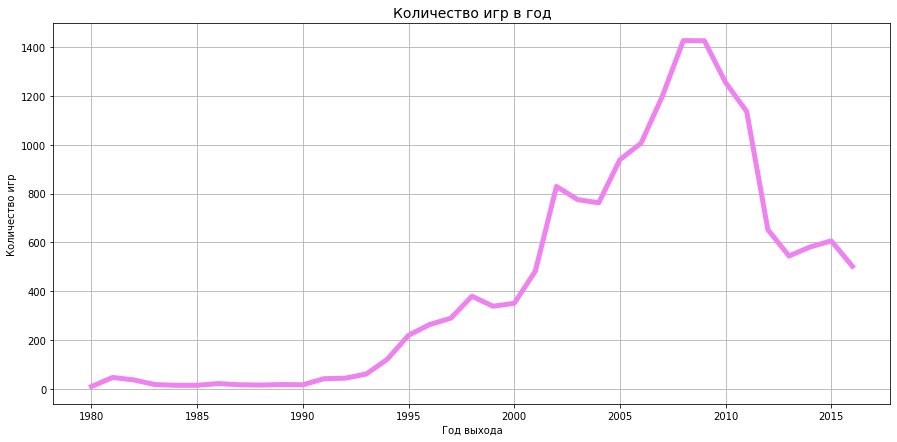

In [35]:
# Рассчитаем с помощью сводной таблицы количество игр в год и нарисуем график
ax = (df.pivot_table(index  ='year_of_release', 
                     values ='name', 
                     aggfunc='count').
    plot(color    ='violet',
         linewidth=5,
         grid     =True,
         figsize  =(15,7),
         legend=False))
ax.set(ylabel='Количество игр',
       xlabel= 'Год выхода')
ax.set_title('Количество игр в год', fontsize=14)
plt.show;

In [36]:
# функция для построения барплота
def plot_subs(plot_data_count_games, rotate, title, xlabel, ylabel, ylim):
    ''''
    input:
        data - данные, по которым строим график
        name_group - по какому признаку группируем данные
        values - какие значения берем
        rotate - как поворачиваем подписи на оси x
        title - название графика
        xlabel - подпись оси x
        ylabel - подпись оси y
        ylim - ограничения по оси y
    '''
    plt.figure(figsize=(20,10))
    plt.title(title, size = 20)
    ax = plot_data_count_games.plot(kind='bar', rot=rotate)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))
    plt.xlabel(xlabel, size=15)
    plt.ylabel(ylabel, size=15)
    
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [37]:
plot_data_count_games = df.groupby(df['year_of_release'])['name'].count()

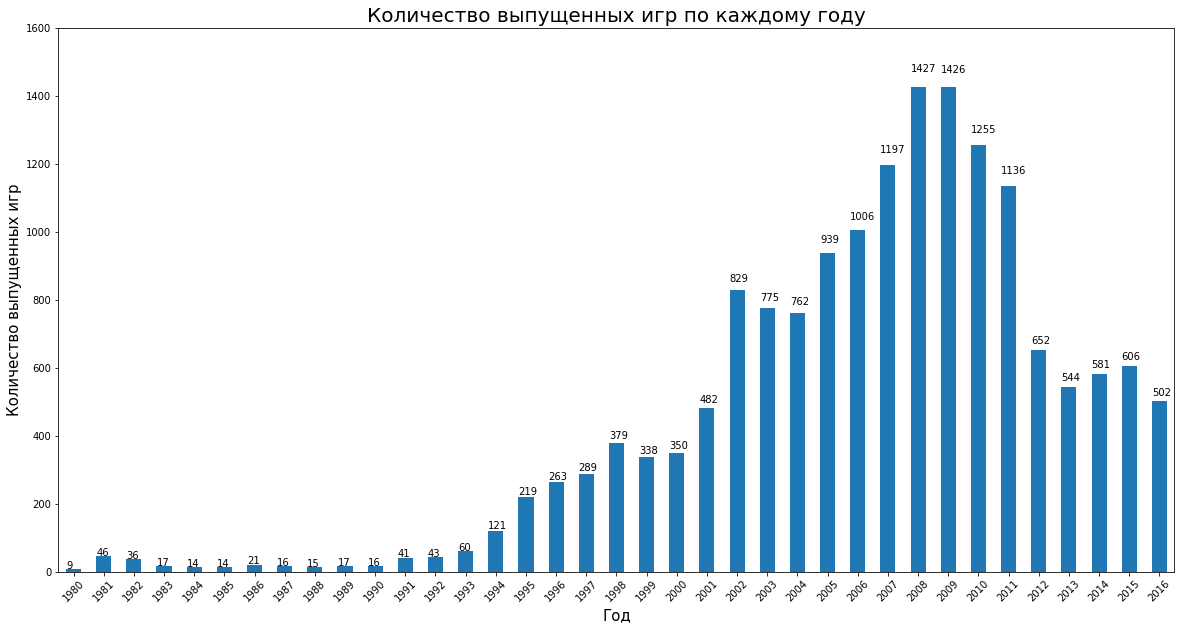

In [38]:
plot_subs(plot_data_count_games, 45, 'Количество выпущенных игр по каждому году', 'Год', \
          'Количество выпущенных игр', ylim=(None, 1600)  )

**Вывод**

C 1980 по 1993 год, игровая индустрия только зарождалась. По графикам видим, что 1980-1993 годы выпускалось наименьшее количество игр (эти данные не очень важны, т.к. выборка небольшая и их анализ не даст объективных результатов). Далее индустрия начала интенсивно развиваться вплоть до 2008 и 2009 года, когда количество выпущенных игр достигло своего пика в 1427 игр. с 2008 года выпуск игр практически с каждым годом становится все меньше. В 2016 году мы видим наименьшее значение  пика в 502 игры, что может быть связано с тем, что у нас данные не за полный год.
Спад после пика предположительно может быть связан с развитием мобильных устройств, соц.сетей и играм в них. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

### Анализ продаж по игровым платформам.
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [39]:
platform_pivot = df.pivot_table(index = 'platform',  values = 'sum_reg_sales', aggfunc = 'sum')
platform_pivot.describe()

,sum_reg_sales
count,31.000000
mean,284.334194
std,343.953517
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


Если рассмотреть сумму продаж по каждой платформе за все года, можно заметить, что в среднем суммарные продажи составляли около 284 млн проданных копий. Наибольшее значение - 1233 млн проданных копий, наименьшее - 3 000 проданных копий.

In [40]:
# Определим платформы с максимальными продажами
df_max_sales_platform = df.groupby('platform')['sum_reg_sales'].agg('sum').sort_values(ascending=False).head(10)
df_max_sales_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_reg_sales, dtype: float64

Выберем топ 6 (а не топ 5, т.к. всё-таки PS надо взять в разработку)

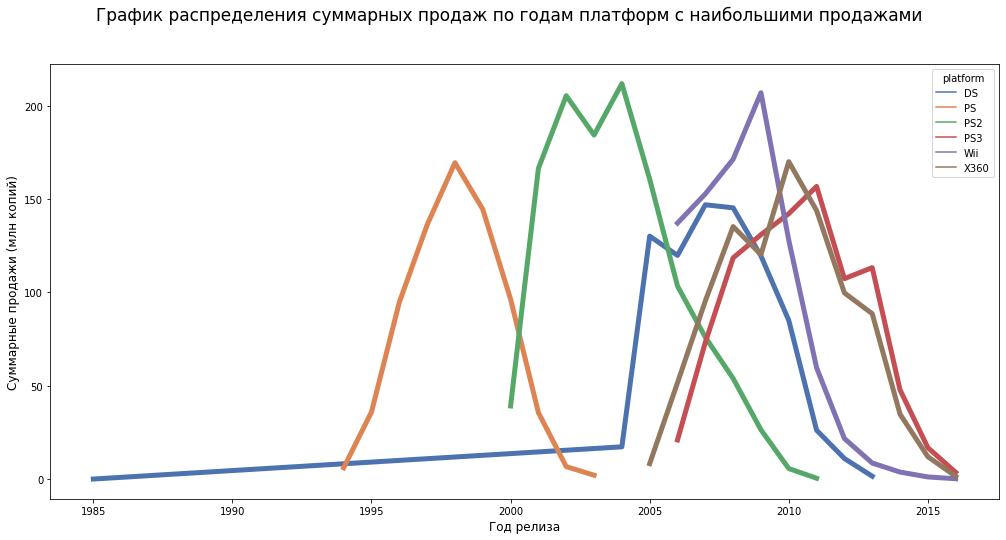

In [41]:
# Продажи игр на платформах с максимальными продажами по годам
plot_data = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])].groupby(['platform', 'year_of_release'])['sum_reg_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж по годам платформ с наибольшими продажами', size=17)
sns.lineplot(data = plot_data, x='year_of_release', y='sum_reg_sales', hue='platform', palette='deep', legend='brief', linewidth=5)
plt.xlabel('Год релиза', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)

plt.show()

у Nintendo DS подозрительно длинный график с 1985 года, посмотрим данные по платформе:

In [42]:
df[df['platform']=='DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_reg_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,0,0,0,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,0,0,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,0,0,0,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,0,0,0,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,0,0,0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,0,0,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,0,0,E10+,0.03
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,0,0,E,0.18
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,0,0,0,0.51


Видим, что платформа появилась в 2004 (Wikipedia подвреждает), а строка с 1985 - ошибка

In [43]:
df = df.drop(labels = [15957], axis = 0)

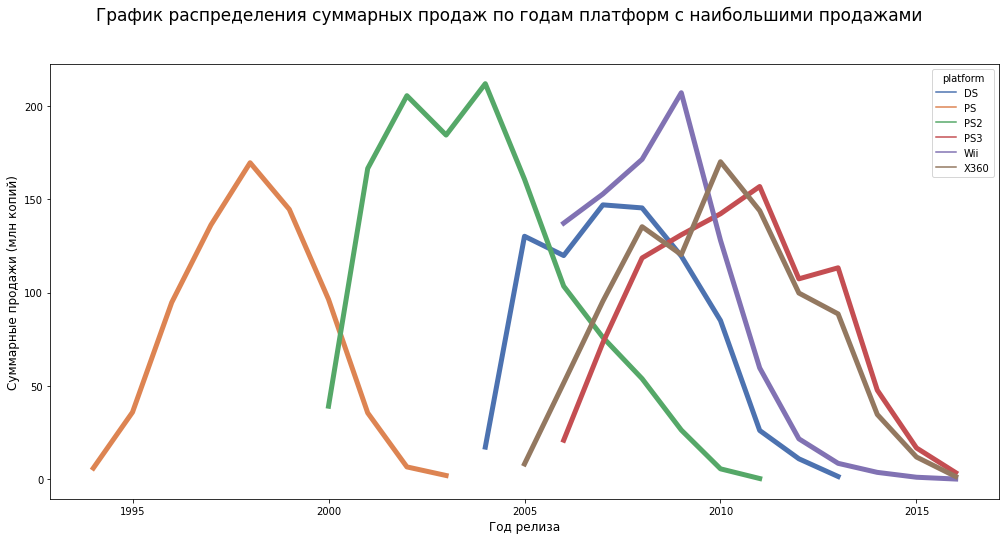

In [44]:
plot_data = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])].groupby(['platform', 'year_of_release'])['sum_reg_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж по годам платформ с наибольшими продажами', size=17)
sns.lineplot(data = plot_data, x='year_of_release', y='sum_reg_sales', hue='platform', palette='deep', legend='brief', linewidth=5)
plt.xlabel('Год релиза', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)

plt.show()

**Вывод**

По всем платформам исходя из графика наблюдаем рост суммарных продаж после возникновения платформы, затем достижение определенного пика, после которого наблюдается падение продаж. Наибольшее значение суммарных продаж видим у платформы PS2 в 2004 году - около 210 млн. копий. Недалеко от нее ушла платформа Wii в 2009 году - около 207 млн. копий.

Самый пик наступает примерно через 5 лет после выхода приставки

In [45]:
# Время жизни игровых платформ
(df.query('platform in @df_max_sales_platform.index').
             pivot_table(index  ='year_of_release', 
                         columns='platform', 
                         values ='sum_reg_sales', 
                         aggfunc='sum')).notna().sum()

platform
3DS      6
DS      10
GBA      8
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
Wii     11
X360    12
dtype: int64

**Вывод**

Время жизни наиболее популярных платформ составляет до 12 лет - в среднем порядка 10 лет. Из представленных PS4 только 4 года - основную ставку стоит делать на нее.

Касаемо SONY насколько я знаю 7 лет платформа поддерживается, потом выходит новая консоль, и предыдущая доживает свой век на автопилоте как раз еще года 3.

### Определение актуальных данных.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.(Не учитывайте в работе данные за предыдущие годы).

За актуальный период примем 5 лет. Данные за более ранний период, не помогут построить прогноз на 2017 год, так как игровых платформ из более далёкого прошлого уже не существует или они есть, но нет новых релизов для них. Также по графикм пик продаж наступает спустя 5 лет после выхода консоли.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
Какие платформы лидируют по продажам, растут или падают?

На основании полученных данных выберем несколько потенциально прибыльных платформ.

In [46]:
# Составим список игровых платформ, актуальных на 2016 год
actual_platforms = list(df.query('year_of_release == 2016')['platform'].unique())
# Отфильтруем данные по актуальному периоду и списку актуальных платформ
df_actual = df[df['year_of_release'] >= 2012].query('platform in @actual_platforms')

final_platform_list = df_actual['platform'].unique()

### Выбор потенциально прибыльных платформ.

Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Для решения этой задачи:
- Произведём анализ выручки от года выпуска игры, в разбивке по платформам;

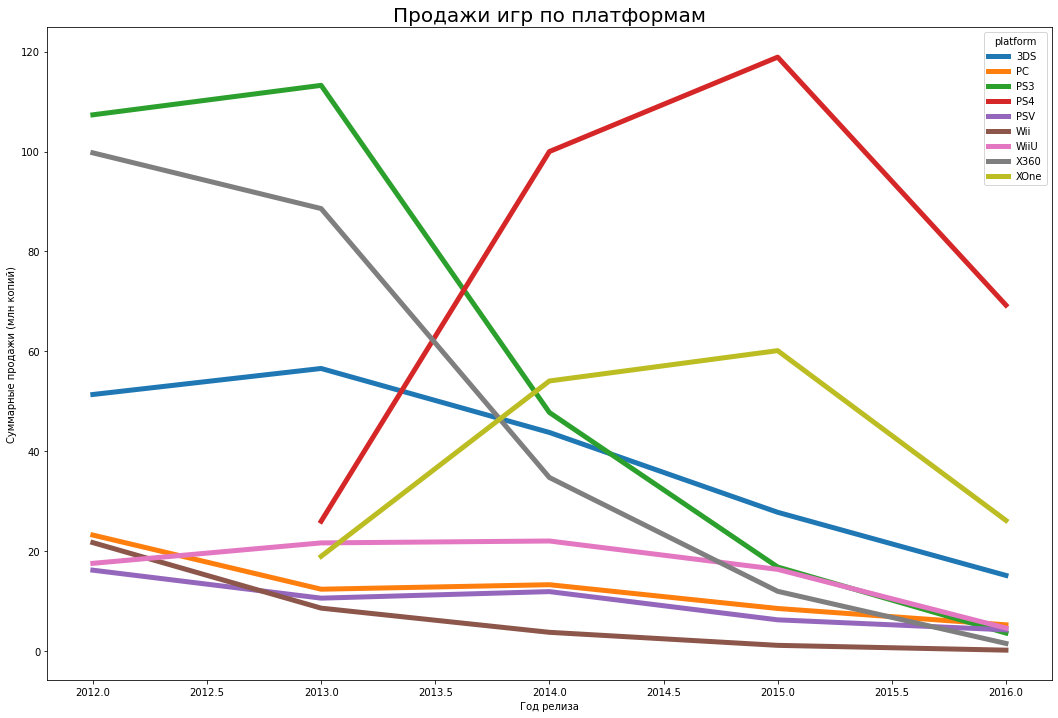

In [47]:
ax = (df_actual.pivot_table(index='year_of_release', 
                          columns='platform', 
                          values ='sum_reg_sales', 
                          aggfunc='sum').
            plot(linewidth=5, 
                 figsize  =(18,12)))
ax.set(ylabel='Суммарные продажи (млн копий)',
       xlabel= 'Год релиза')
ax.set_title('Продажи игр по платформам', fontsize=20)
plt.show;

Для принятия окончательного решения по перспективным платформам посмотрим продажи:

In [48]:
df_on_period = df[df['year_of_release'] >= 2012].pivot_table(index = 'platform', \
                    values = ['na_sales', 'eu_sales', 'jp_sales', 'sum_reg_sales'], aggfunc = 'sum')
df_on_period.sort_values(by = 'sum_reg_sales', ascending = False).head(5)

,eu_sales,jp_sales,na_sales,sum_reg_sales
platform,,,,
PS4,141.09,15.96,108.74,314.14
PS3,106.85,35.29,103.38,288.78
X360,74.52,1.57,140.05,236.54
3DS,42.64,87.79,55.31,194.61
XOne,51.59,0.34,93.12,159.32


In [49]:
df_up_2012 = df[df['year_of_release'] >= 2012]

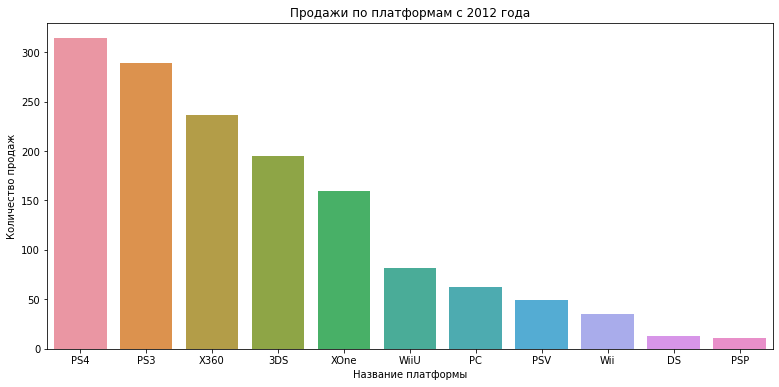

In [50]:
df_on_period_graph = df_up_2012.pivot_table(index='platform', values='sum_reg_sales', aggfunc='sum').sort_values(by = 'sum_reg_sales', 
                                                                                                        ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(data = df_on_period_graph, x= df_on_period_graph.index, y= df_on_period_graph['sum_reg_sales'])
plt.title("Продажи по платформам с 2012 года")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

**Вывод:**
- Продажи снижаются в последнее время у всех платформ
- Наибольшие продажи - PS4, XOne, 3DS
- К перспективным я бы отнес 2 платформы - PS4, XOne/ 3DS напрашивается, но он в основном актуален в Японии (если этот рынок в приоритетных то его стоит включить)
- PS4, XOne  появились недавно, и по логике, должны выходить в текущее время на пики продаж, но в последние два года, наоборот стагнируют. Их списывать со счетов ещё рано.
- 3DS также показывает хорошие продажи в Японии, но продажи последние годы стабильно снижаются.
- Платформа PC не показывает больших продаж, однако не умирает уже три десятка лет. В будущем, скорее всего будет также.


### Глобальные продажи игр в разбивке по платформам (ящик с усами)

#### Анализ распределения выручки по глобальным продажам игр в разбивке по платформам. 

 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

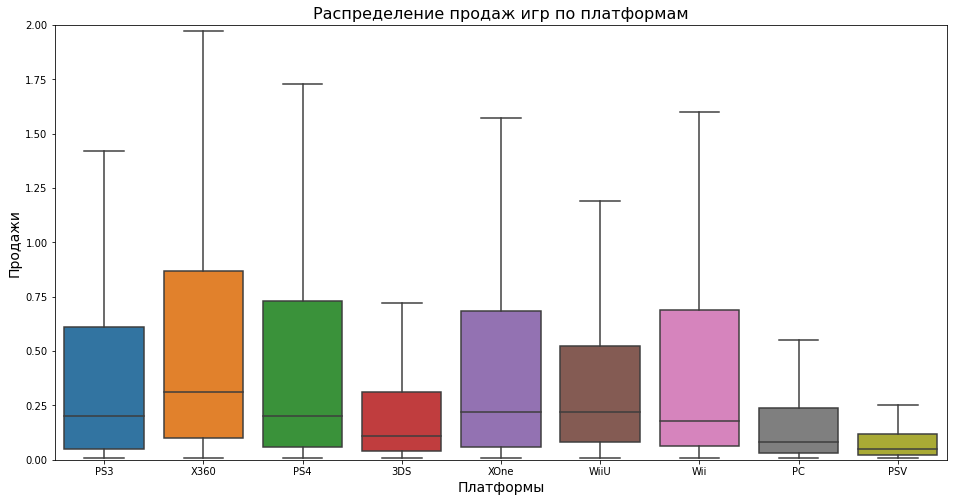

In [51]:
plt.figure(figsize=(16,8))
boxplot = sns.boxplot(data=df_actual, x='platform', y='sum_reg_sales', showfliers = False)
boxplot.axes.set_title("Распределение продаж игр по платформам", fontsize=16)
boxplot.set_xlabel("Платформы", fontsize=14)
boxplot.set_ylabel("Продажи", fontsize=14)

plt.ylim(0, 2)
plt.show()

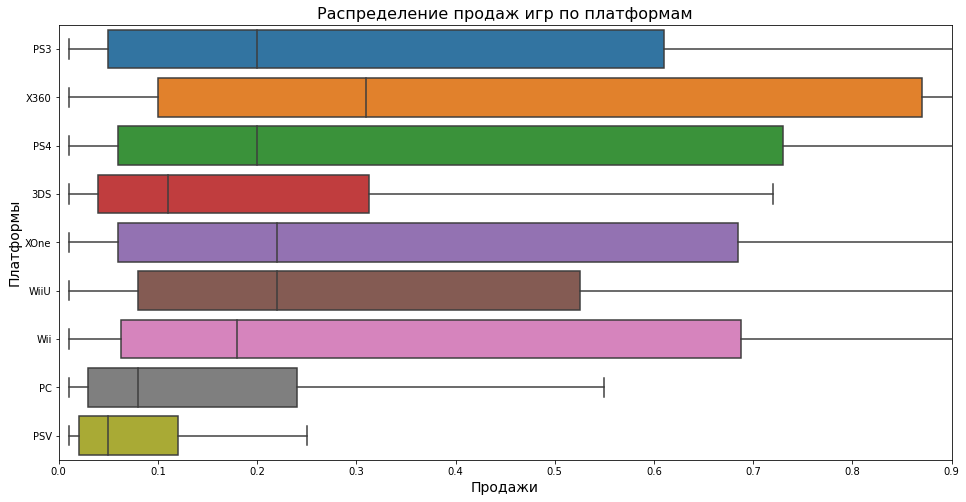

In [52]:
plt.figure(figsize=(16,8))
boxplot = sns.boxplot(data=df_actual, y='platform', x='sum_reg_sales', showfliers = False)
boxplot.axes.set_title("Распределение продаж игр по платформам", fontsize=16)
boxplot.set_xlabel("Продажи", fontsize=14)
boxplot.set_ylabel("Платформы", fontsize=14)
plt.xlim(0, 0.9)
plt.show()

График был выведен без учёта абсолютных хитов - выбросов.Ниже выведем с выбросами. 

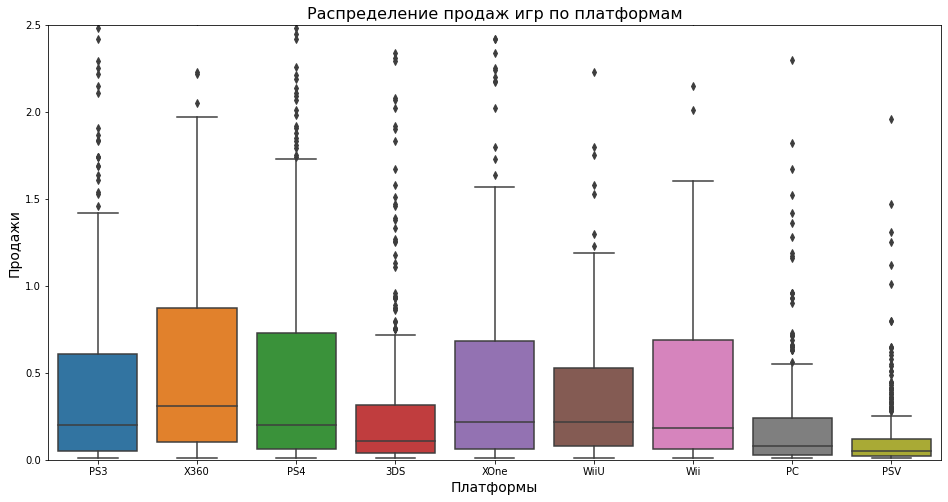

In [53]:
plt.figure(figsize=(16,8))
boxplot = sns.boxplot(data=df_actual, x='platform', y='sum_reg_sales', showfliers = True)
boxplot.axes.set_title("Распределение продаж игр по платформам", fontsize=16)
boxplot.set_xlabel("Платформы", fontsize=14)
boxplot.set_ylabel("Продажи", fontsize=14)

plt.ylim(0, 2.5)
plt.show()

**Вывод:**
По анализу графиков «ящик с усами» по платформам за актуальный период можно сгруппировать платформы по схожести их распределений продаж:
- X360, XOne  - продажи относительно схожи, медиана x360 ольше чем у Xone но X360 закончил жизненный цикл и прошел его;
- PS3, PS4 - продажи и медианы схожи;
- Wii, WiiU - WiiU - продажи и медианы относительно схожи;

Причины схожести - консоли одного производителя, но разных поколений.

- PC, PSV - схожи по характеру продаж, но различаются по сути;
- 3DS - стоит особняком, так как представленна, в основном, в Японии.

Видим большой объем продаж для x360 и ps3 но не будем забывать, что жизненный цикл этих приставок подошёл к концу.
Больше всего продаж на текущий момент у X360, но не забываем что PS4 здесь всего 4 года, а X360 почти 12 лет.
Выдающиеся продажи также у WII (распространен в основномв Японии), но платформа закончила свой жизненный цикл

- Также есть схожесть у прямых актуальных конкурентов - PS4 и XBOX ONE

**Вывод**

В целом, начиная с 2008 года продажи игр на всех популярных платформах снижались. Связано это, скорее всего, с возрастающей распространённостью игр на мобильных устройствах, и переходом большего числа игроков на мобильные платформы. Этот сегмент, в данном исследовании не охвачен.
Исходя из вышеизложенного анализа, перспективной платформой в 2017 году, с некоторыми оговорками, можно считать только PS4, XOne. Но, если бы в данном датасете были представленны данные по продажам игр на мобильных устройствах, то вывод был бы однозначен - необходимо делать ставку на мобильные платформы.

### Оценка влияния отзывов пользователей и критиков на продажи.

Для оценки влияния отзывов пользователей и критиков на продажи:

- Произведём оценку влияния отзывов пользователей и критиков на продажи внутри одной игровой платформы;
- Соотнесём выводы с продажами игр на других платформах.

#### Оценка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для анализа выберем платформу из актуального периода, которая прошла весь жизненный цикл для релевантности данных - X360. Для этого построим диаграмму рассеяния и рассчитаем корреляцию между отзывами и продажами. Здесь возьму данные за весь период жизни консоли, а не актуальный период - так как это более показательно.

In [54]:
box_360=df.query('platform == "X360" and critic_score > 0 and user_score > 0')

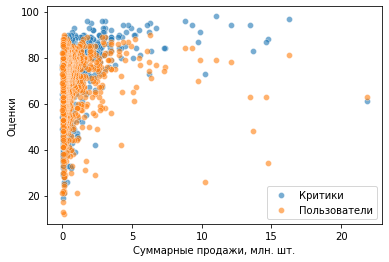

In [55]:
sns.scatterplot(data=box_360, x='sum_reg_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=box_360, x='sum_reg_sales', y='user_score', alpha=0.6)
plt.xlabel('Суммарные продажи, млн. шт.')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

На графике видим одну игру, суммарные продажи по которой составили почти 21 млн. 

In [56]:
box_360[box_360['sum_reg_sales'] > 20]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_reg_sales
14,Kinect Adventures!,X360,2010,Misc,15.0,4.89,0.24,1.69,61,63,E,21.82


In [57]:
#Корреляция между оценками пользователей и продажами 
box_360['user_score'].corr(box_360['sum_reg_sales'])

0.11027967172869059

In [58]:
#Корреляция между оценками критиков и продажами 
box_360['critic_score'].corr(box_360['sum_reg_sales'])

0.3889921155786245

In [59]:
box_360_filtered = box_360[['sum_reg_sales' ,'critic_score', 'user_score']]

<AxesSubplot:>

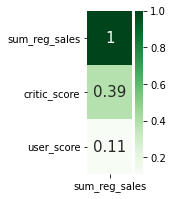

In [60]:
plt.figure(figsize=(1,3))
sns.heatmap(box_360_filtered.corr()[['sum_reg_sales']].sort_values(by='sum_reg_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Посмотрим поближе, возьмём продажи менее 1 млн копий.

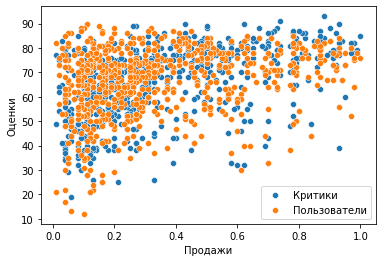

In [61]:
box_360_lowsales = box_360.query('sum_reg_sales<1')
sns.scatterplot(data=box_360_lowsales, x='sum_reg_sales', y='critic_score' )
sns.scatterplot(data=box_360_lowsales, x='sum_reg_sales', y='user_score')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [62]:
#Корреляция между оценками пользователей и продажами для игр с продажами до 1 млн копий
box_360_lowsales['user_score'].corr(box_360_lowsales['sum_reg_sales'])

0.2471856028207881

In [63]:
#Корреляция между оценками критиков и продажами для игр с продажами до 1 млн копий
box_360_lowsales['critic_score'].corr(box_360_lowsales['sum_reg_sales'])

0.46912478340016883

Посмотрим поближе, возьмём продажи хитов от 5 млн копий.

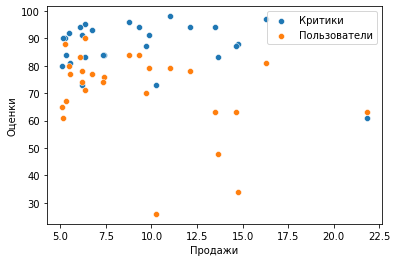

In [64]:
box_360_hits = box_360.query('sum_reg_sales>5')
sns.scatterplot(data=box_360_hits, x='sum_reg_sales', y='critic_score' )
sns.scatterplot(data=box_360_hits, x='sum_reg_sales', y='user_score')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [65]:
#Корреляция между оценками пользователей и продажами для игр с продажами от 5 млн копий
box_360_hits['user_score'].corr(box_360_hits['sum_reg_sales'])

-0.3716004785076412

In [66]:
#Корреляция между оценками критиков и продажами для игр с продажами от 5 млн копий
box_360_hits['critic_score'].corr(box_360_hits['sum_reg_sales'])

-0.214839983050822

**Вывод:**
На примере игровой платформы X360, видно, что Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. 

Видим, что самые продаваемые игры имеют оценки критиков от 60 баллов и выше, пользователи же обычно более суровы.
Но пользователь может поставить игре низкую оценку просто так, чего критик обычно не может себе позволить. 

Зависимость от оценок обоих групп выше у игр с продажами до 1 млн.

Для супер хитов корреляция не выявлена, коэффициент корреляции между оценками пользователей и критиков меньше для хитовых игр.
Игры супер-хиты, как правило, выпускаются крупными студиями с огромными бюджетами на разработку и маркетинг, и уже выпущенными ранее нескольими хитовыми играми. Здесь на продажи влияет и доверие игроков и реклама и "сарафанное радио", и авторитетность игровой франшизы, издателя.

Для большей уверенности в сделанных выводах, произведём подобный анализ для других платформ.

#### Соотнесение выводов с продажами игр на других платформах. 

Построим диаграмму рассеяния и рассчитаем корреляцию между отзывами и продажами для актуальных платформ - ранее сохранили их в final_platfom_list.

In [67]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sum_reg_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_reg_sales', data=platform, ax=ax[1], color='red')
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['sum_reg_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_reg_sales'])
    
    
    if -0.4 <= critic_correl <= 0.4:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Корреляция не выявлена', critic_correl)
    if  0.4 < critic_correl <= 0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Слабая', critic_correl)
    if  critic_correl > 0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Сильная', critic_correl)
    if -0.4 > critic_correl >= -0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Слабая', critic_correl)
    if -0.7 > critic_correl:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if -0.4 <= correl <= 0.4:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if  0.4 < correl <= 0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Слабая', correl)
    if  correl > 0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Сильная', correl)
    if -0.4 > correl >= -0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Слабая', correl)
    if -0.7 > correl:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Сильная', correl)
    
    print('\n')

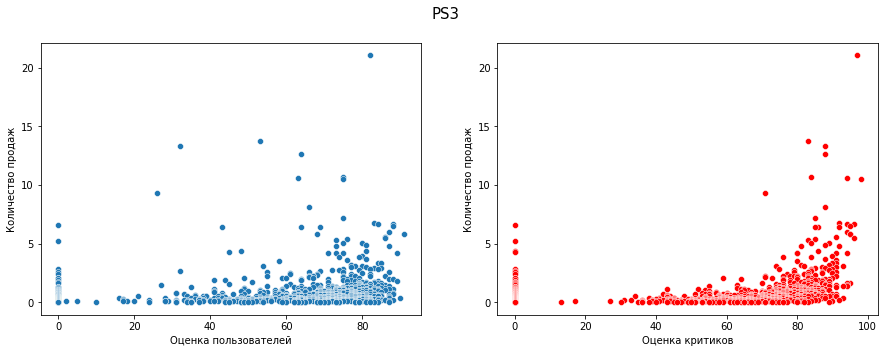

Корреляция между отзывами критиков и продажами для платформы  PS3 : Корреляция не выявлена 0.3557675633246372
Корреляция между отзывами пользователей и игровой платформой  PS3 : Корреляция не выявлена 0.27474053768233886




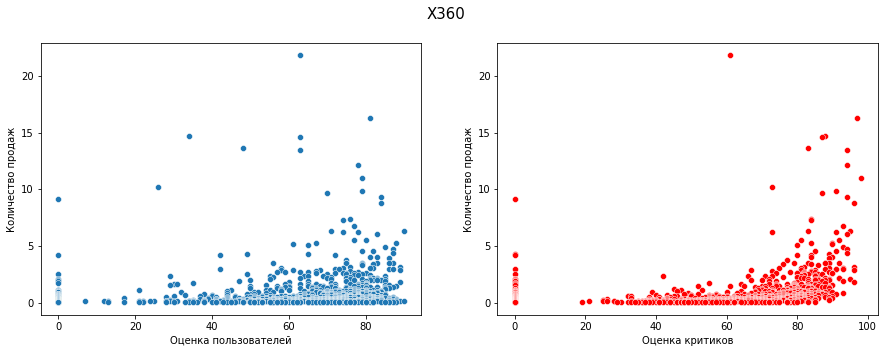

Корреляция между отзывами критиков и продажами для платформы  X360 : Корреляция не выявлена 0.3117562516201688
Корреляция между отзывами пользователей и игровой платформой  X360 : Корреляция не выявлена 0.20780580062906817




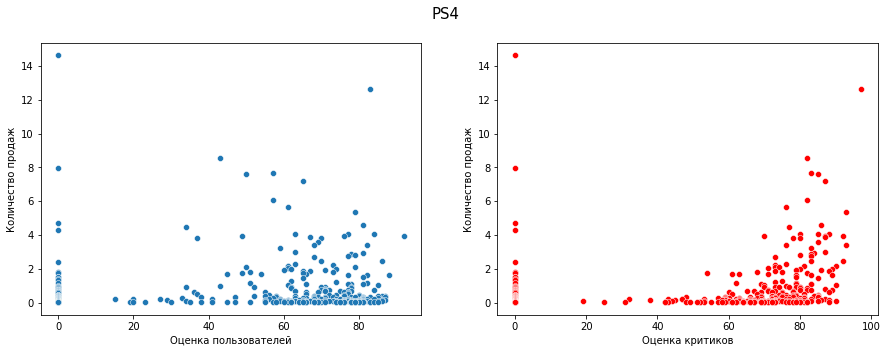

Корреляция между отзывами критиков и продажами для платформы  PS4 : Корреляция не выявлена 0.22754960627752652
Корреляция между отзывами пользователей и игровой платформой  PS4 : Корреляция не выявлена 0.11311562450852865




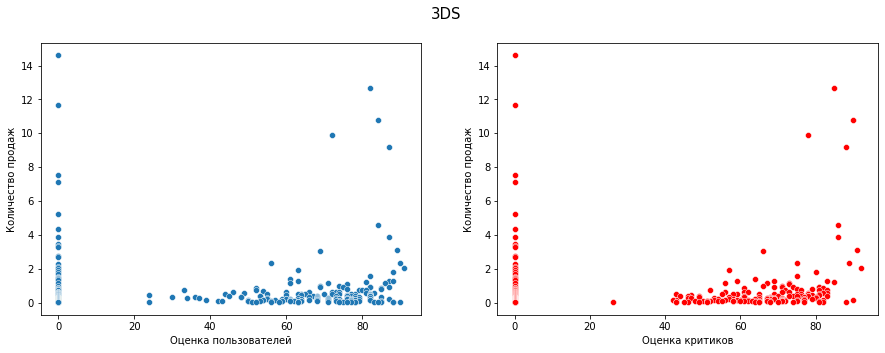

Корреляция между отзывами критиков и продажами для платформы  3DS : Корреляция не выявлена 0.16702057976149196
Корреляция между отзывами пользователей и игровой платформой  3DS : Корреляция не выявлена 0.1500533936060985




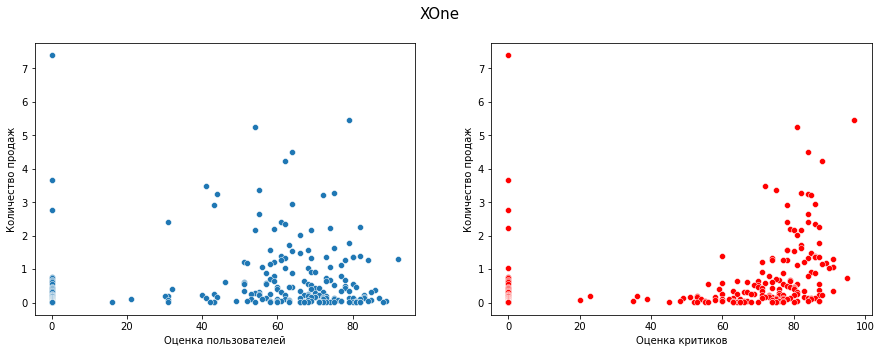

Корреляция между отзывами критиков и продажами для платформы  XONE : Корреляция не выявлена 0.2748391874944539
Корреляция между отзывами пользователей и игровой платформой  XONE : Корреляция не выявлена 0.11656261405851882




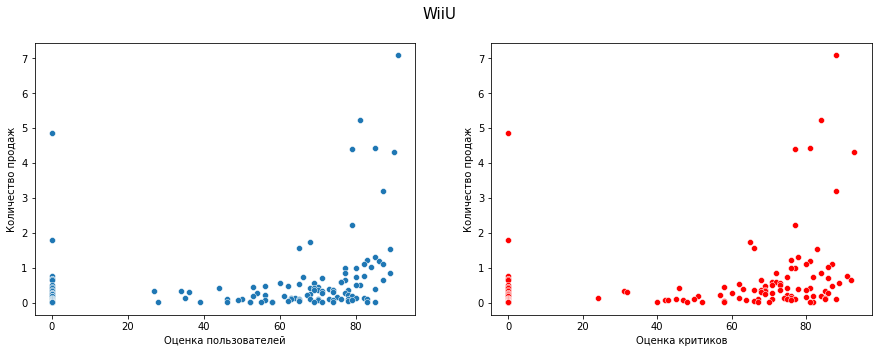

Корреляция между отзывами критиков и продажами для платформы  WIIU : Корреляция не выявлена 0.29812398749349167
Корреляция между отзывами пользователей и игровой платформой  WIIU : Корреляция не выявлена 0.2711403191078004




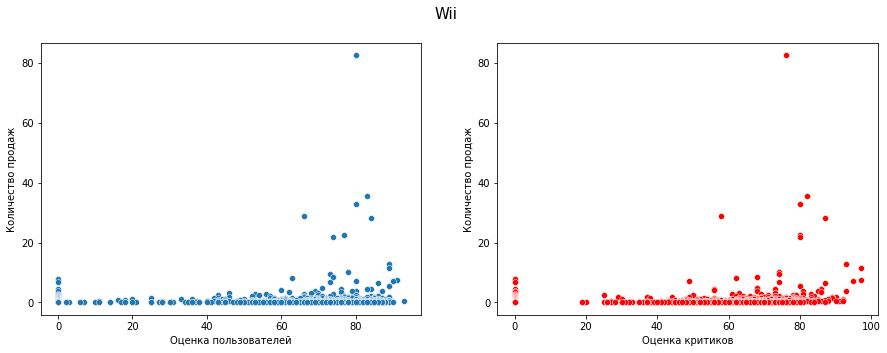

Корреляция между отзывами критиков и продажами для платформы  WII : Корреляция не выявлена 0.1889438279968329
Корреляция между отзывами пользователей и игровой платформой  WII : Корреляция не выявлена 0.18452742791944837




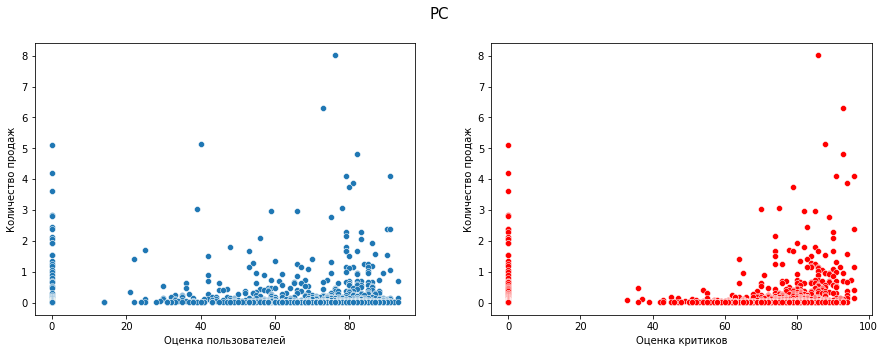

Корреляция между отзывами критиков и продажами для платформы  PC : Корреляция не выявлена 0.07960697248057366
Корреляция между отзывами пользователей и игровой платформой  PC : Корреляция не выявлена 0.008723360369642644




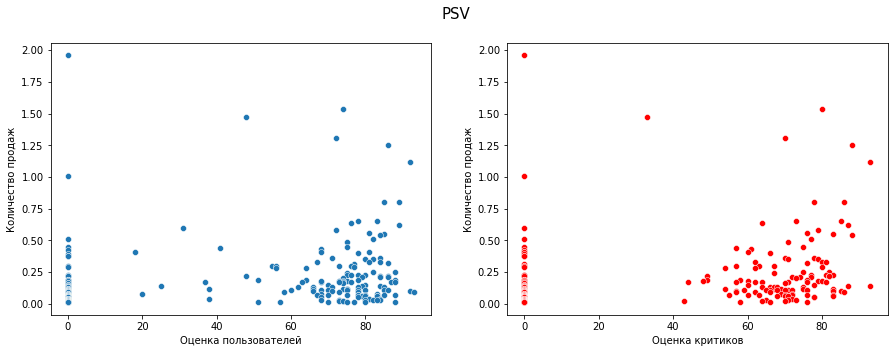

Корреляция между отзывами критиков и продажами для платформы  PSV : Слабая 0.40339691283276563
Корреляция между отзывами пользователей и игровой платформой  PSV : Корреляция не выявлена 0.3769021819697886




In [68]:
for i in final_platform_list:
    other_platform_matrix(i)

**Вывод:**
Проанализировав актуальные на 2016 год платформы, подтвердили, что наши выводы по платформе X360 оказались верны. 

**Вывод**

* Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют"

Такое положение дел, наиболее вероятно, сложилось потому что пользователи купив игру уже проголосовали за не рублём. Ведь чтобы поставить оценку, пользователю необходимо сначала купить игру. Но её не купят те, кому она совсем не нравится или ее жанр. Отсюда и отсутствие связи между продажами и оценками пользователей. С оценками критиков, картина немного другая. Критики более объективны в своих оценках, пользователь может поставить игре низкую оценку просто так или по причине не оправдала ожиданий/баги на релизе, чего критик обычно не может себе позволить.  Отсюда и более сильная корреляция продаж и их оценок. Однако, очевидно, что продажи двигают вверх не оценки пользователей и критиков, а како-то другой параметр, выходящий за рамки данного исследования. Возможно это размер бюджета рекламной компании,авторитетность игровой франшизы, издателя. или популярность самой игровой платформы.

### Анализ распределения игр по жанрам.

Проанализируем общее распределение игр по жанрам для актуальных платформ и периода. 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

Для ответов на эти вопросы произведём группировку игр по жанрам с рассчётом количества игр, суммарных продаж и продаж на одну игру.

In [69]:
# Сводная таблица с расчётами
df_genre = df_actual.pivot_table(index = 'genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
df_genre = df_genre.merge(df_actual.pivot_table(index = 'genre', values='sum_reg_sales', aggfunc='sum'), on='genre')
df_genre['sales_per_game'] = df_genre['sum_reg_sales'] / df_genre['name']
df_genre

,name,sum_reg_sales,sales_per_game
genre,,,
Action,953,435.54,0.457020
Role-Playing,339,180.91,0.533658
Sports,255,179.54,0.704078
Adventure,247,27.70,0.112146
Shooter,235,304.73,1.296723
Misc,180,84.15,0.467500
Racing,115,53.50,0.465217
Fighting,105,44.13,0.420286
Platform,83,60.31,0.726627


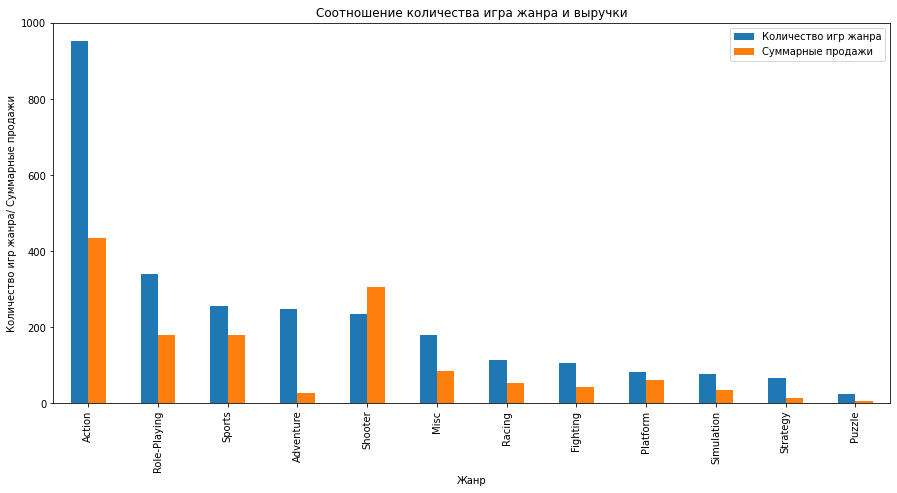

In [70]:
# График зависимости Количество и продажи игр по жанрам
ax = df_genre[['name','sum_reg_sales']].plot(kind='bar', 
                                     figsize=(15,7), 
                                     title='Соотношение количества игра жанра и выручки')
ax.set(ylabel='Количество игр жанра/ Суммарные продажи',
       xlabel= 'Жанр')
plt.legend(['Количество игр жанра', 'Суммарные продажи'])
plt.show;

На графике видно, что количество проданых игр, и суммарные продажи не всегда находятся в прямой зависимости. Для определения ценности игр построим график продаж на одну игру по жанрам.

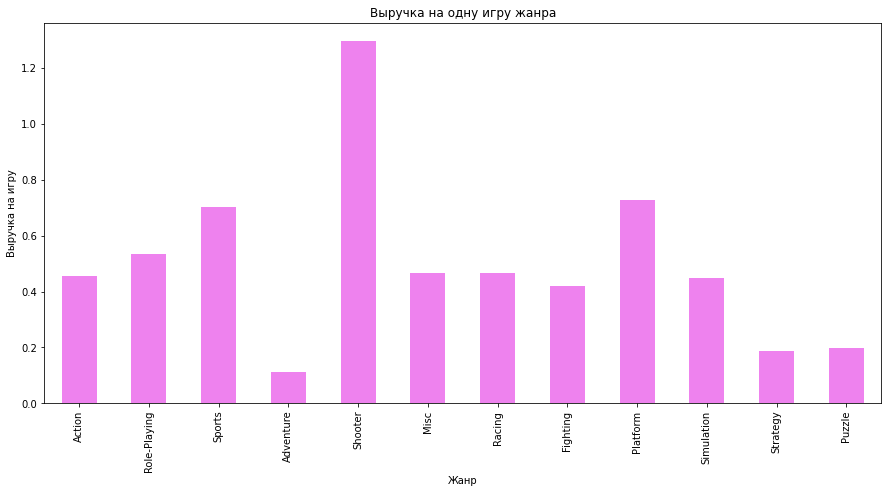

In [71]:
# График зависимости продаж на одну игру по жанрам
ax = df_genre['sales_per_game'].plot(kind='bar', 
                              figsize=(15,7), 
                                title='Выручка на одну игру жанра',
                                color='violet')
ax.set(ylabel='Выручка на игру',
       xlabel= 'Жанр')
plt.show;

**Вывод**

Самые продаваемые жанры игр: action, sport, shooter и role-playing. Из диаграммы, мы видим, что продажи по жанрам прямопропорциональны количеству игр этого жанра. Наиболее эффективными с точки зрения выручки на одну игру являются игры жанров shooter, platform и sports.

**Вывод по разделу**

- Актуальный период определён как 5 лет (с 2012) на основании пика продаж через 5 лет после выхода консоли, то потенциально прибыльные платформы будут те платформы, которые вышли с 2012 года. Из дальнейшего анализа, также, исключили игровые платформы не актуальные на 2016 год.
- В целом, начиная с 2008 года продажи игр на всех популярных платформах снижались. Связано это, скорее всего, с возрастающей распространённостью игр на мобильных устройствах, и переходом большего числа игроков на мобильные платформы.
- Перспективной платформой в 2017 году, с некоторыми оговорками, можно считать только PS4, XOne, либо Nintendo DS если потенциальный рынок -Япония. Но, если бы в данном датасете были представленны данные по родажам игр на мобильных устройствах, то вывод был бы однозначен - необходимо делать ставку на мобильные платформы (только предположительно).
- Зависимость продаж от оценок критиков и пользователей - корреляция продаж и отзывов пользователей практически отсутствует. Корреляция продаж с оценками критиков немного сильнее. Анализировали оценки по платформе xbox 360 за весь период ее жизни т.к.она прошла весь жизненный цикл 12 лет.
- Самые продаваемые жанры игр: action, sport, shooter и role-playing. Из диаграммы, мы видим, что продажи по жанрам прямопропорциональны количеству игр этого жанра. 
- Наиболее эффективными с точки зрения выручки на одну игру являются игры жанров shooter, platform и sports.


## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определение популярности игровых платфор в регионах

Для решения данной задачи построим столбчатую диаграмму распределения продаж по регионам и платформам для выбранного ранее актуального периода.

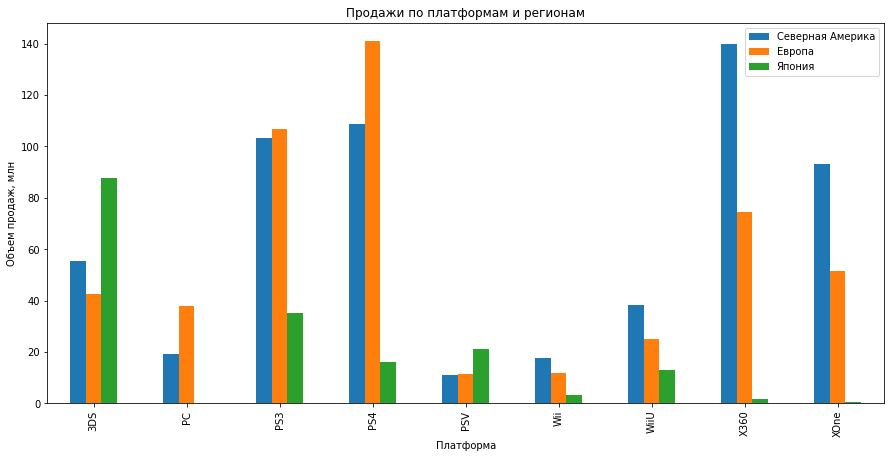

In [72]:
# Сводная таблица 
df_region_platform = df_actual.pivot_table(index = 'platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# Поменяем порядок колонок для наглядности
df_region_platform = df_region_platform.reindex(columns=['na_sales','eu_sales','jp_sales'])


ax = df_region_platform.plot(kind='bar', 
                            figsize=(15,7), 
                            title='Продажи по платформам и регионам')
ax.set(xlabel='Платформа',
       ylabel= 'Объем продаж, млн')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show;

На графике видно, что в разных регионах, пользуются популярностью разные игровые платформы. Для удоства определения топ 5 популярных платформ, построим такиеже графики отдельно для каждого региона и отсортруем значения в них.  


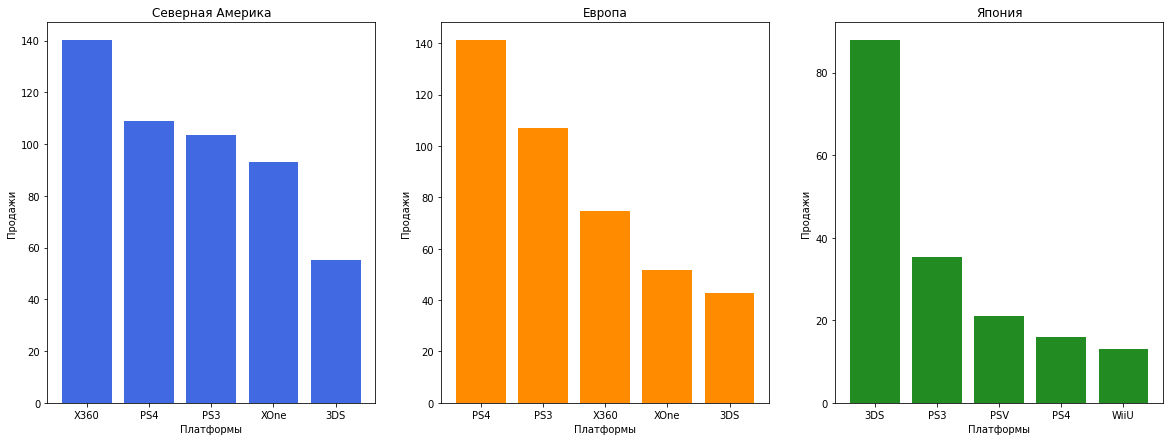

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

n = 0
colors = ['royalblue','darkorange','forestgreen']
for ax in axes:
    i_df = df_region_platform[df_region_platform.columns[n]].sort_values(ascending=False).head()
    ax.bar(i_df.index,i_df, color=colors[n])
    ax.set(title=(['Северная Америка', 'Европа', 'Япония'][n]), ylabel='Продажи', xlabel='Платформы') 
    n += 1
plt.show()

Топ 5 платформ по регионам в актуальном периоде с 2012 года (за последние 5 лет):
- Северная Америка: X360, PS4, PS3, XOne, 3DS;
- Европа:  PS4, PS3, X360, XOne, 3DS;
- Япония: 3DS, PS3,  PSV, PS4, WiiU.

**Вывод**

Все логично:
- в Америке в лидерах продукт Microsoft и далее Sony
- в Европе более популярны Sony (удерживает позицию и старый добрый PC)
- в Японии местные производители в лидерах, уклон в портативные платформы. Американские приставки не приветствуются=)

### Определение популярности игровых жанров в регионах

Для решения данной задачи построим столбчатую диаграмму распределения продаж по регионам и игровым жанрам.

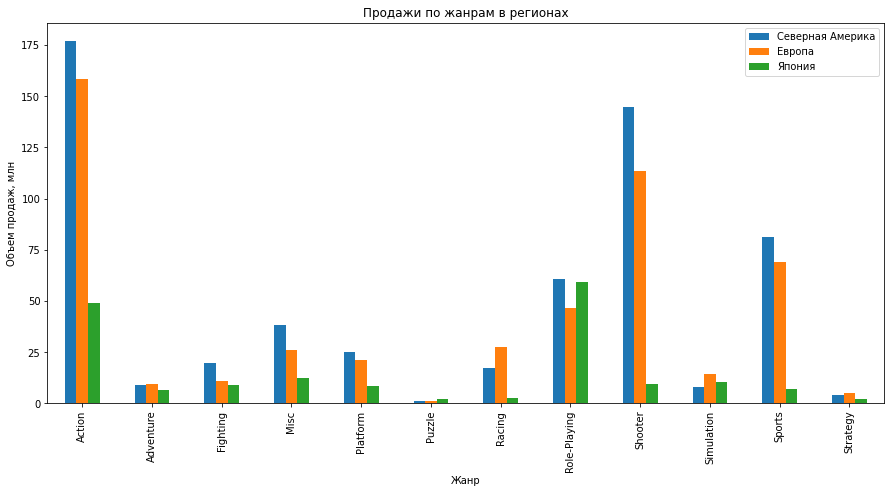

In [74]:
# Сводная таблица 
df_region_genre = df_actual.pivot_table(index = 'genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# Поменяем порядок колонок для наглядности
df_region_genre = df_region_genre.reindex(columns=['na_sales','eu_sales','jp_sales'])
ax = df_region_genre.plot(kind='bar', 
                            figsize=(15,7), 
                            title='Продажи по жанрам в регионах')
ax.set(xlabel='Жанр',
       ylabel= 'Объем продаж, млн')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show;

На графике видно, что в разных регионах, пользуются популярностью разные игровые жанры. Для удоства определения топ 5 популярных игровых жанров, построим такиеже графики отдельно для каждого региона и отсортруем значения в них.

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

['Role-Playing', 'Action', 'Misc', 'Simulation', 'Shooter']

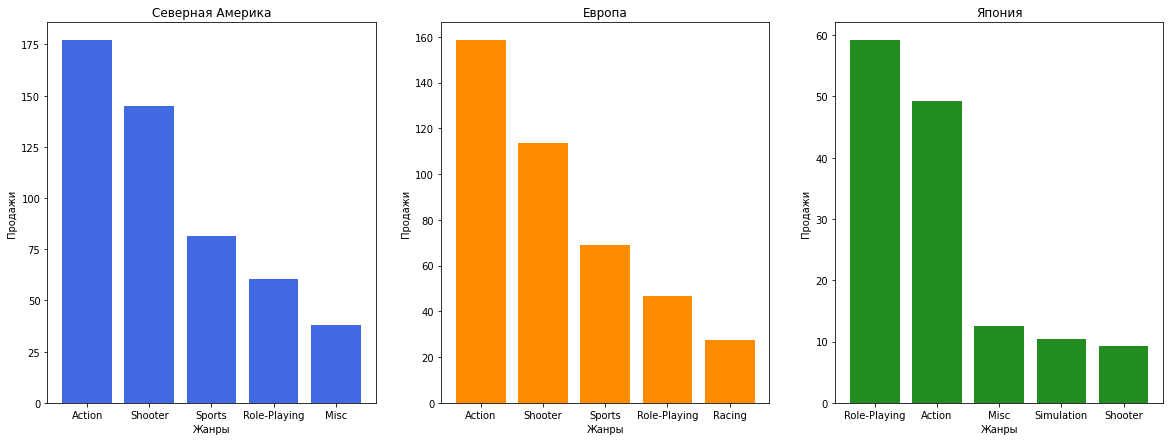

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

n = 0
colors = ['royalblue','darkorange','forestgreen']
for ax in axes:
    i_df = df_region_genre[df_region_genre.columns[n]].sort_values(ascending=False).head()
    display(list(i_df.index))
    ax.bar(i_df.index,i_df, color=colors[n])
    ax.set(title=(['Северная Америка', 'Европа', 'Япония'][n]), ylabel='Продажи', xlabel='Жанры')
    n += 1
plt.show()

Топ 5 игровых жанров по регионам:

- Северная америка: Action, Shooter, Sports, Role-Playing, Misc;
- Европа: Action, Shooter,  Sports, Role-Playing, Racing;
- Япония: Role-Playing, Action, Misc, simulation, Shooter.

**Вывод**

Топ-5 жанров игр для рынка Северной Америки и европы отличаются только на одну(пятую) позицию. Топ-4 в данных регионах совпадают. Пятую позицию в этих регионах занимаеют другие жанры и гонки соответственно. В Японии предпочтения игроков отличаются от остальных регионов более значительно. В Японии больше всего любят ролевые игры. В топ-5, также входят игры жанра Симуляторы.

### Влияние рейтина ESRB на продажи

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

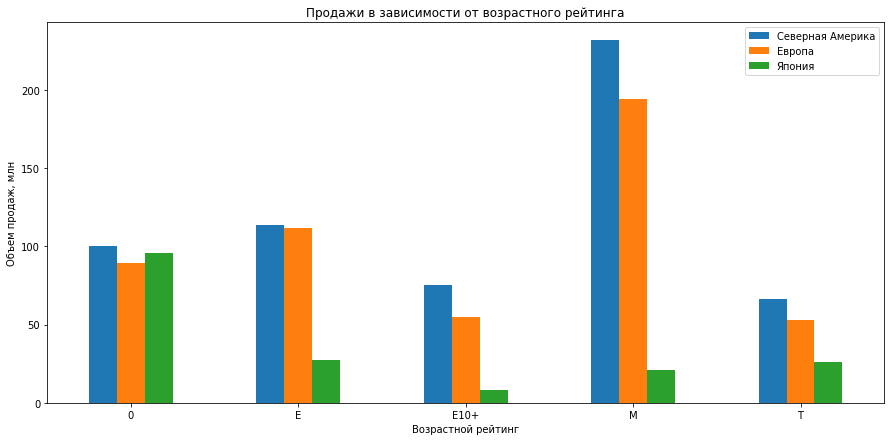

In [76]:
# Сводная таблица 
df_region_rating = df_actual.pivot_table(index = 'rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# Поменяем порядок колонок для наглядности
df_region_rating = df_region_rating.reindex(columns=['na_sales','eu_sales','jp_sales'])
ax = df_region_rating.plot(kind='bar', 
                            figsize=(15,7),
                            rot=0,
                            title='Продажи в зависимости от возрастного рейтинга')
ax.set(xlabel='Возрастной рейтинг', ylabel= 'Объем продаж, млн')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show;

По такому графику трудно оценить отличия продаж по регионам в зависимости от рейтинга игр. Произведём расчёт доли продаж для каждого региона в зависисмости от рейтинга.

In [77]:
# Расчёт доли продаж по рейтингу для каждого региона
df_region_rating['na_percent'] = (df_region_rating['na_sales']/df_region_rating['na_sales'].sum())*100
df_region_rating['eu_percent'] = (df_region_rating['eu_sales']/df_region_rating['eu_sales'].sum())*100
df_region_rating['jp_percent'] = (df_region_rating['jp_sales']/df_region_rating['jp_sales'].sum())*100

In [78]:
df_region_rating

,na_sales,eu_sales,jp_sales,na_percent,eu_percent,jp_percent
rating,,,,,,
0,100.13,89.32,95.62,17.079744,17.762399,53.601659
E,113.44,111.78,27.62,19.350107,22.228851,15.482931
E10+,75.09,54.84,8.19,12.808529,10.905620,4.591065
M,231.57,193.96,21.20,39.500213,38.571372,11.884074
T,66.02,52.96,25.76,11.261407,10.531758,14.440271


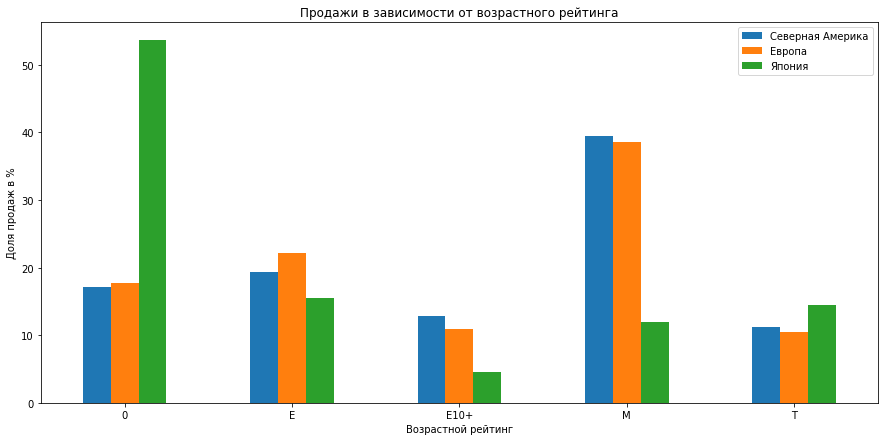

In [79]:
ax = df_region_rating[['na_percent','eu_percent','jp_percent']].plot(kind='bar', 
                            figsize=(15,7),
                            rot=0,
                            title='Продажи в зависимости от возрастного рейтинга')
ax.set(xlabel='Возрастной рейтинг', ylabel= 'Доля продаж в %')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show;

**Вывод**

В Европе и Северной Америке предпочтения игр по рейтингу схожи. В Японии больше покупают игр с рейтингом T,  меньше игр с рейтингом M. Однако, доля продаж игр с неопределённым рейтингом в Японии значительно превосходит долю продаж игр с неопределённым рейтингом (пропуски ранее заменили на 0) в Европе и Америке вместе взятых. Это может означать, что больше половины игр продаваемых в Японии не получают рейтинг ESRB. У них есть своё рейтинговое агенство CERO, данные которого отсутствуют в датасете. Таким образом, оценить предпочтения японских игроков по рейтингу игр не представляется возможным.

**Вывод по разделу**

Предпочтения игроков по игровым платформам, жанрам игр и категориям игр по рейтингу ESRB схожи для Северной Америки и Европы, а для Японии отличаются.

## Проверьте гипотезы

Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."


Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для лучшего представления распределения сравниваемых выборок, сначала построим гистограммы. Затем, для принятия нулевой или альтернативной гипотезы, применим t-тест к выборкам.  Статистическую значимость примем равной 5%.

In [80]:
# удаляем значения-заглушки
df_actual = df_actual[df_actual['user_score'] != 0]

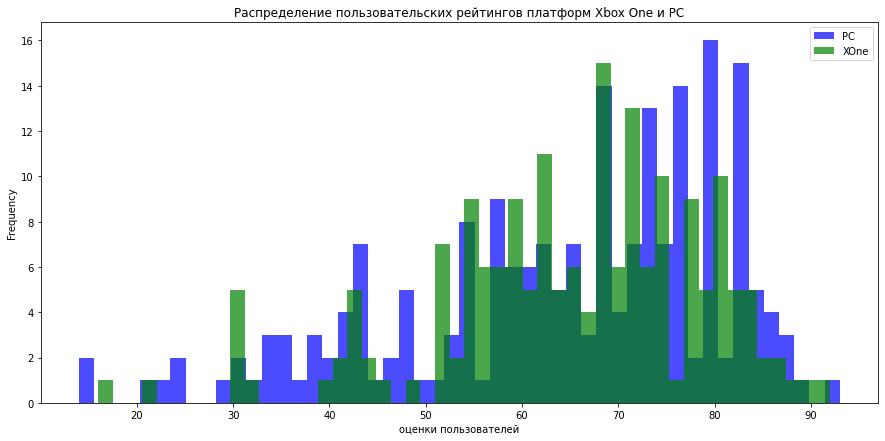

Средние оценки ползователей платформы PC: 64.2864077669903
Средние оценки ползователей платформы X-box One: 65.21428571428571


In [81]:
# Выборки по платформам выделим в отдельные таблицы
df_xone = df_actual[df_actual['platform'] == 'XOne']
df_pc   = df_actual[df_actual['platform'] == 'PC' ]

# Построение гистограмм    
ax = df_pc.plot(  y    ='user_score',
                  kind ='hist',
                  color='blue',
                  alpha=0.7,
                  label='PC',
                  bins =50)
ax.set_xlabel('оценки пользователей')
(df_xone.plot(  y      ='user_score',
                ax     =ax,
                kind   ='hist',
                color  ='green',
                alpha  =0.7,
                label  ='XOne',
                title  ='Распределение пользовательских рейтингов платформ Xbox One и PC',
                bins   =50,
                figsize=(15,7)))
plt.show()

print('Средние оценки ползователей платформы PC:', df_pc['user_score'].mean())
print('Средние оценки ползователей платформы X-box One:',df_xone['user_score'].mean())


In [82]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_xone['user_score'],
                       df_pc['user_score'],
                       equal_var = False)
 
print('p-значение: ', results.pvalue)

# если p-value окажется меньше него - отвегнем гипотезу
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965135056
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевая гипотеза подтверждена: У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

### Проверка гипотезы: "Средние пользовательские рейтинги жанров Action и Sports  разные.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Для лучшего представления распределения сравниваемых выборок, сначала построим гистограммы. Затем, для принятия нулевой или альтернативной гипотезы, применим t-тест к выборкам.  Статистическую значимость примем равной 5%.

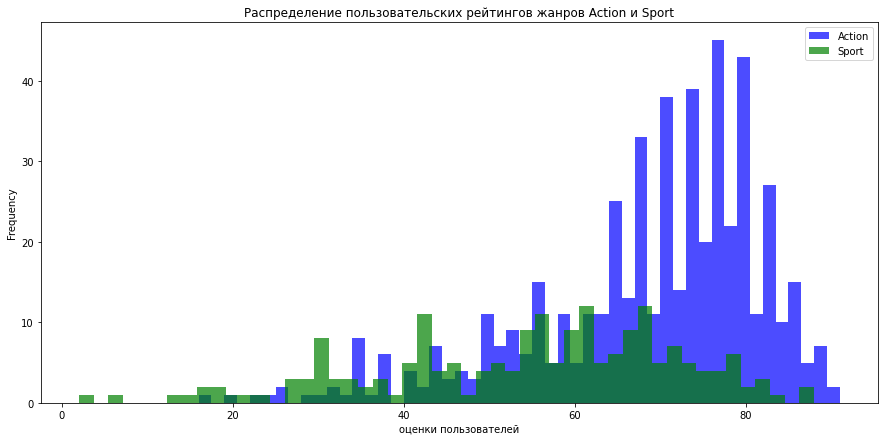

Средние оценки ползователей рейтинги жанра Action: 68.33653846153847
Средние оценки ползователей рейтинги жанра Sport: 54.66321243523316


In [83]:
# Выборки по платформам выделим в отдельные таблицы
df_action = df_actual[df_actual['genre'] == 'Action'].dropna()
df_sport  = df_actual[df_actual['genre'] == 'Sports' ].dropna()

# Построение гистограмм    
ax = df_action.plot(y    ='user_score',
                  kind ='hist',
                  color='blue',
                  alpha=0.7,
                  label='Action',
                  bins =50)
ax.set_xlabel('оценки пользователей')
(df_sport.plot(y      ='user_score',
            ax     =ax,
            kind   ='hist',
            color  ='green',
            alpha  =0.7,
            label  ='Sport',
            title  ='Распределение пользовательских рейтингов жанров Action и Sport',
            bins   =50,
            figsize=(15,7)))
plt.show()

print('Средние оценки ползователей рейтинги жанра Action:', df_action['user_score'].mean())
print('Средние оценки ползователей рейтинги жанра Sport:',df_sport['user_score'].mean())

In [84]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_action['user_score'],
                       df_sport['user_score'],
                       equal_var = False)
 
print('p-значение: ', results.pvalue)

# если p-value окажется меньше него - отвегнем гипотезу
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.312394745169519e-20
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу, принимаем альтернативную: У нас нет оснований утверждать, что Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Вывод по разделу**

- Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - подтверждена;
- Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" - отвергнута.


## Вывод по проекту

**1. Входные данные**
Для анализа был получен датасет содержащий 16715 строк.
Имелись пропуски в столбцах:

* Critic_Score
* User_Score
* Rating
* Name
* Year_of_Release
* Genre

Входящие Типы данных:

* Year_of_Release - год релиза игры - и его тип данных float, а не int
* User_Score - оценки пользователей = имеет неверный тип данных object, максимальная оценка 10, а у критиков 100 (необходимо масштабировать оценку соразмерно критикам и задать итогов тип int)
* Critic_Score - оценки критиков = имеет неверный тип данных float, а должен иметь int, т.к. в нём целые численные значения, на metacritic - приняты целые значения оценок у критиков).
* В User_Score помимо должных цифр, имеется значение tbd

**2. Предобработка данных**

- Изменен регистр названий колонок в соответствии с общепринятыми номами;
- Преобразованы типы данных: 
    - колонку Year_of_Release в int
    - колонку User_Score привели к типу данных float, далее привели систему к 100-баллов как у критиков, и итогово к типу int/ 
    - Critic_Score преобразуем в int (на metacritic - приняты целые значения оценок критиков)
- Проверили на дубликаты
- Обработаны пропуски:
    - 'name', 'year_of_release', 'genre' - принято решение удалить пропуски, так как пропусков по ним было мало (менее 2%) - это не сильно исказит наши данные и позволит избавиться от пропусков;
    - 'user_score' - аббревиатуру от To Be Determined (tbd) заменили на NaN
    - 'critic_score', 'user_score', 'rating' - пропуски/NaN заполнили маркером-заглушкой 0.
- Произведён расчёт суммарных продаж во всех регионах и добавлена колонна с этими данными.

**3. Исследовательский анализ**

Если рассмотреть сумму продаж по каждой платформе за все года, можно заметить, что в среднем суммарные продажи составляли около 284 млн проданных копий. Наибольшее значение - 1233 млн проданных копий, наименьшее - 3 000 проданных копий.

По всем платформам исходя из графика наблюдаем рост суммарных продаж после возникновения платформы, затем достижение определенного пика, после которого наблюдается падение продаж. Наибольшее значение суммарных продаж видим у платформы PS2 в 2004 году - около 210 млн. копий. Недалеко от нее ушла платформа Wii в 2009 году - около 207 млн. копий.

Самый пик наступает примерно через 5 лет после выхода приставки.

Время жизни наиболее популярных платформ составляет до 12 лет - в среднем порядка 10 лет. Из представленных PS4  только 4 года - она в самом расцвете.

Касаемо SONY насколько я знаю 7 лет платформа поддерживается, потом выходит новая консоль, и предыдущая доживает свой век на автопилоте как раз еще года 3.


**По анализу графиков «ящик с усами»:**
по платформам за актуальный период можно сгруппировать платформы по схожести их распределений продаж:
- X360, XOne  - продажи и медианы относительно схожи;
- PS3, PS4 - продажи и медианы схожи;
- Wii, WiiU - WiiU - продажи и медианы относительно схожи;

Причины схожести - консоли одного производителя, но разных поколений.

- PC, PSV - схожи по характеру продаж, но различаются по сути;
- 3DS - стоит особняком, так как представленна, в основном, в Японии.

Видим большой объем продаж для x360 и ps3 но не будем забывать, что жизненный цикл этих приставок подошёл к концу.
Больше всего продаж на текущий момент у X360, но не забываем что PS4 здесь всего 4 года, а X360 почти 12 лет- платформа прошла ВЕСЬ свой жизненный цикл.
Выдающиеся продажи также у WII (распространен в основном в Японии), но платформа закончила свой жизненный цикл

- Также есть схожесть у прямых актуальных конкурентов - PS4 и XBOX ONE

- Актуальный период определён как 5 лет (с 2012) на основании пика продаж через 5 лет после выхода консоли, то потенциально прибыльные платформы будут те платформы, которые вышли с 2012 года. Из дальнейшего анализа, также, исключили игровые платформы не актуальные на 2016 год.
В целом, начиная с 2008 года продажи игр и количество вырущенных игр на всех популярных платформах снижались. Связано это, скорее всего, с возрастающей распространённостью игр на мобильных устройствах, и переходом большего числа игроков на мобильные платформы.
Перспективной платформой в 2017 году, с некоторыми оговорками, можно считать только PS4, XOne, либо Nintendo DS если потенциальный рынок -Япония. Но, если бы в данном датасете были представленны данные по родажам игр на мобильных устройствах, то вывод был бы однозначен - необходимо делать ставку на мобильные платформы (только предположительно).


**Самые продаваемые жанры игр: action, sport, shooter и role-playing. Из диаграммы, мы видим, что продажи по жанрам прямопропорциональны количеству игр этого жанра.**

**Наиболее эффективными с точки зрения выручки на одну игру являются игры жанров shooter, platform и sports.**

**Топ 5 платформ по регионам в актуальном периоде с 2012 года (за последние 5 лет):**

* Северная Америка: X360, PS4, PS3, XOne, 3DS;
* Европа: PS4, PS3, X360, XOne, 3DS;
* Япония: 3DS, PS3, PSV, PS4, WiiU.

Все логично:

* в Америке в лидерах продукт Microsoft и далее Sony
* в Европе более популярны консоли Sony (удерживает позицию и старый добрый PC)
* в Японии местные производители в лидерах, уклон в портативные платформы. Американские приставки не приветствуются=)


**Топ 5 игровых жанров по регионам:**

- Северная америка: Action, Shooter, Sports, Role-Playing, Misc;
- Европа: Action, Shooter,  Sports, Role-Playing, Racing;
- Япония: Role-Playing, Action, Misc, simulation, Shooter.


Топ-5 жанров игр для рынка Северной Америки и Европы отличаются только на одну(пятую) позицию. Топ-4 в данных регионах совпадают. Пятую позицию в этих регионах занимаеют другие жанры и гонки соответственно. В Японии предпочтения игроков отличаются от остальных регионов более значительно. В Японии больше всего любят ролевые игры. В топ-5, также входят игры жанра Симуляторы.

- В Европе и Северной Америке предпочтения игр по рейтингу схожи. В Японии больше покупают игр с рейтингом T, меньше игр с рейтингом M. Однако, доля продаж игр с неопределённым рейтингом в Японии значительно превосходит долю продаж игр с неопределённым рейтингом (пропуски ранее заменили на 0) в Европе и Америке вместе взятых. Это может означать, что больше половины игр продаваемых в Японии не получают рейтинг ESRB. У них есть своё рейтинговое агенство CERO, данные которого отсутствуют в датасете. Таким образом, оценить предпочтения японских игроков по рейтингу игр не представляется возможным.

Предпочтения игроков по игровым платформам, жанрам игр и категориям игр по рейтингу ESRB схожи для Северной Америки и Европы, а для Японии отличаются.

**Влияние оценок критиков и пользователей на продажи**

На примере игровой платформы X360 (как прошедшей весь свой цикл), рассмотрели, что зависимость продаж от отзывов пользователей очень слабая, а от отзывов критиков в 2-3 раза больше, но тоже имеет слабо выраженный характер.

Самые продаваемые игры имеют оценки критиков от 60 баллов и выше, пользователи же обычно более суровы. Но пользователь может поставить игре низкую оценку просто так, чего критик обычно не может себе позволить.

Зависимость от оценок обоих групп выше у игр с продажами до 1 млн.

Для супер хитов корреляция не выявлена, коэффициент корреляции между оценками пользователей и критиков меньше для хитовых игр. Игры супер-хиты, как правило, выпускаются крупными студиями с огромными бюджетами на разработку и маркетинг, и уже выпущенными ранее нескольими хитовыми играми. Здесь на продажи влияет и доверие игроков и реклама и "сарафанное радио", и авторитетность игровой франшизы, издателя.

Для большей уверенности в сделанных выводах, провели анализ анализ для других платформ и подтвердили, что наши выводы по платформе X360 оказались верны. По остальным платформам корреляция продаж и отзывов пользователей практически отсутствует. Корреляция продаж с оценками критиков немного сильнее.


* Влияние отзывов пользователей на продажи практически отсутствует.
* Влияние отзывов критиков на продажи немного сильнее.
Такое положение дел, наиболее вероятно, сложилось потому что пользователи купив игру уже проголосовали за не рублём. Ведь чтобы поставить оценку, пользователю необходимо сначала купить игру. Но её не купят те, кому она совсем не нравится или ее жанр. Отсюда и отсутствие связи между продажами и оценками пользователей. С оценками критиков, картина немного другая. Критики более объективны в своих оценках, пользователь может поставить игре низкую оценку просто так или по причине не оправдала ожиданий/баги на релизе, чего критик обычно не может себе позволить. Отсюда и более сильная корреляция продаж и их оценок. Однако, очевидно, что продажи двигают вверх не оценки пользователей и критиков, а како-то другой параметр, выходящий за рамки данного исследования. Возможно это размер бюджета рекламной компании,авторитетность игровой франшизы, издателя. или популярность самой игровой платформы.

**4. При проверке гипотез сделаны следующие выводы:**

    - Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - подтверждена;
      У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются
    - Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" - отвергнута.
    Отвергаем нулевую гипотезу, принимаем альтернативную: У нас нет оснований утверждать, что Средние пользовательские рейтинги жанров Action и Sports одинаковые.
    
**Главный вывод**, который можно сделать по результатам анализа, это то, что в 2017 году перспективными игровыми платформами можно считать только PS4, XOne. Однако, продажи игр в сегменте игровых платформ падают на протяжении последних восьми лет с 2008 года. Выход новых игровых платформ ситуацию не меняет. Это связано, скорее всего, с переходом пользователей на игры на мобильных телефонах и в соц.сетях. 

**Рекомендации магазину:**
- в 2017 году, необходимо делать акцент на игры для PS4 и XOne - для Европы и Северной Америки и игры жанров Action, Shooter, Sports
- Для Японии - акцент на игры для 3DS,PS4 и ролевые игры, симуляторы.
- Предусмотреть отдельный раздел игр жанров puzzle, platform и racing (Наиболее эффективными с точки зрения выручки на одну игру )
- для Северной Америки стоит в первых рядах показывать игры для XBOX One и вторым эшелоном PS4
- для Европы - игры для PS4 в главные показы, уделить внимание PC играм как вариант
